# QUESTION 1A

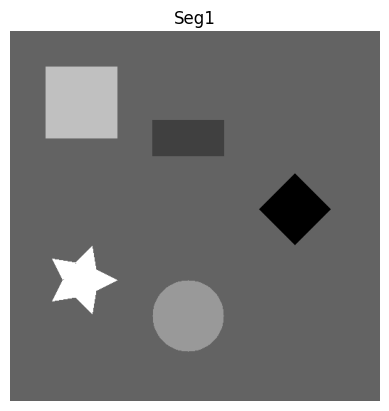

Areas:
square: 10000.0
rectangle: 5000.0
diamond: 5000.0
star: 3753.5
circle: 7704.0


In [8]:
import cv2
import numpy as np
import math, os
import matplotlib.pyplot as plt


# Define image dimensions and background gray level
# Define image dimensions and background gray level
width = 520
height = 520
bg_gray_level = 128


def draw_square(img, size, x, y, gray_level):
    """
    Draws a square on the image with the specified size, position, and gray level.
    """
    half_size = size // 2
    for i in range(-half_size, half_size+1):
        for j in range(-half_size, half_size+1):
            img[y+i, x+j] = gray_level

def draw_rectangle(img, width, height, x, y, gray_level):
    """
    Draws a rectangle on the image with the specified width, height, position, and gray level.
    """
    half_width = width // 2
    half_height = height // 2
    for i in range(-half_height, half_height+1):
        for j in range(-half_width, half_width+1):
            img[y+i, x+j] = gray_level

def draw_diamond(img, size, x, y, gray_level):
    """
    Draws a diamond on the image with the specified size, position, and gray level.
    """
    half_size = size // 2
    for i in range(-half_size, half_size+1):
        for j in range(-half_size, half_size+1):
            if abs(i) + abs(j) <= half_size:
                img[y+i, x+j] = gray_level


def draw_star(img, size, x, y, gray_level):
    """
    Draws a filled star on the image with the specified size, position, and gray level.
    """
    R = size // 2
    r = R // 2.1
    points = []
    for i in range(5):
        theta = i * 4 * math.pi / 5
        x1 = x + R * math.cos(theta)
        y1 = y + R * math.sin(theta)
        points.append((int(x1), int(y1)))
        theta += 2 * math.pi / 5
        x2 = x + r * math.cos(theta)
        y2 = y + r * math.sin(theta)
        points.append((int(x2), int(y2)))
    pts = np.array(points, np.int32)
    mask = np.zeros(img.shape[:2], np.uint8)
    cv2.fillPoly(mask, [pts], gray_level)
    img[mask == gray_level] = gray_level

    # Draw a small filled circle at the center of the star
    center_size = size // 4
    center_x = x
    center_y = y
    cv2.circle(img, (center_x, center_y), center_size, gray_level, -1)


def draw_circle(img, size, x, y, gray_level):
    """
    Draws a circle on the image with the specified size, position, and gray level.
    """
    radius = size // 2
    cv2.circle(img, (x, y), radius, gray_level, -1)

def create_object(shape, size, x, y, gray_level):
    """
    Creates an object with the specified shape, size, position, and gray level.
    """
    if shape == "square":
        return draw_square, size, x, y, gray_level
    elif shape == "rectangle":
        return draw_rectangle, size, size // 2, x, y, gray_level
    elif shape == "diamond":
        return draw_diamond, size, x, y, gray_level
    elif shape == "star":
        return draw_star, size, x, y, gray_level
    elif shape == "circle":
        return draw_circle, size, x, y, gray_level

# Create image
img = np.ones((height, width), dtype=np.uint8) * bg_gray_level

# Define objects
objects = [
    ("square", 100, 100, 100, 200),
    ("rectangle", 100, 250, 150, 100),
    ("diamond", 100, 400, 250, 50),
    ("star", 100, 100, 350, 250),
    ("circle", 100, 250, 400, 170)
]

# Draw objects and store their areas
areas = []
for obj in objects:
    shape, size, x, y, gray_level = obj
    draw_func, *draw_args = create_object(shape, size, x, y, gray_level)
    draw_func(img, *draw_args)
    contours, hierarchy = cv2.findContours((img == gray_level).astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    area = cv2.contourArea(contours[0])
    # area = size ** 2 if shape in ("square", "rectangle") else math.pi * (size/2)**2 if shape == "circle" else size**2/2
    # area = np.count_nonzero(img == gray_level)
    areas.append((shape, area))

# Display image and print areas
plt.imshow(img, 'gray')
plt.title("Seg1")
plt.axis('off')
plt.show()

cv2.imwrite('/content/drive/MyDrive/Medical Imaging Final/Output/SEG1.png', img)

print("Areas:")
for shape, area in areas:
    print(f"{shape}: {area}")    


# Question 1B

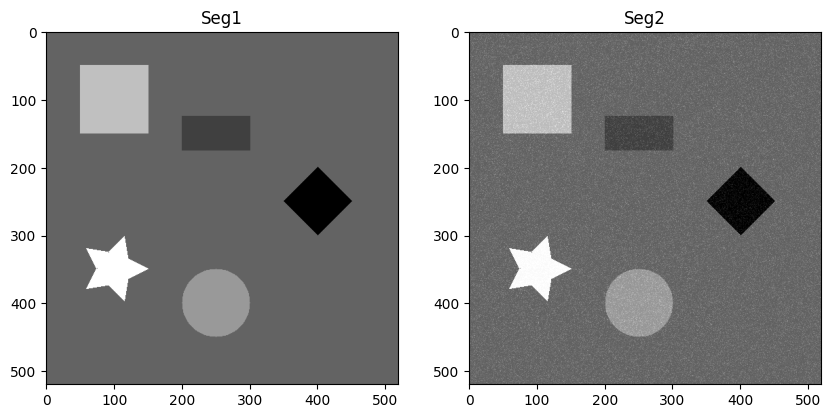

In [3]:
mean = 0
stddev = 15
noise = np.zeros_like(img)
cv2.randn(noise, mean, stddev)
noisy_img = cv2.add(img, noise, dtype=cv2.CV_8UC1)

_, axis = plt.subplots(1, 2, figsize = (10,10))
axis[0].imshow(img, 'gray')
axis[0].set_title('Seg1')

axis[1].imshow(noisy_img, 'gray')
axis[1].set_title('Seg2')

plt.show()

# Question 1C

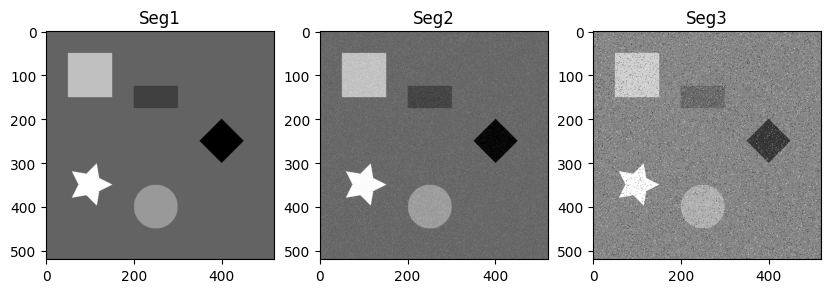

In [ ]:
def add_salt_pepper_noise(image, prob):
    h, w = image.shape[:2]
    output = np.copy(image)

    # Generate a random matrix with probabilities for each pixel
    prob_matrix = np.random.rand(h, w)

    # Add salt noise
    output[prob_matrix < prob / 2] = 0

    # Add pepper noise
    output[prob_matrix > 1 - prob / 2] = 255

    return output

    
impulse_img = add_salt_pepper_noise(noisy_img, 0.5)
_, axis = plt.subplots(1, 3, figsize = (10,10))
axis[0].imshow(img, 'gray')
axis[0].set_title('Seg1')

axis[1].imshow(noisy_img, 'gray')
axis[1].set_title('Seg2')


axis[2].imshow(impulse_img, 'gray')
axis[2].set_title('Seg3')

plt.show()

# Different values of gaussian noise and impulse

/content/drive/MyDrive/Medical Imaging Final/Output


<ipython-input-5-acfd57c50e5a>:32: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(3, 3, pos)


True

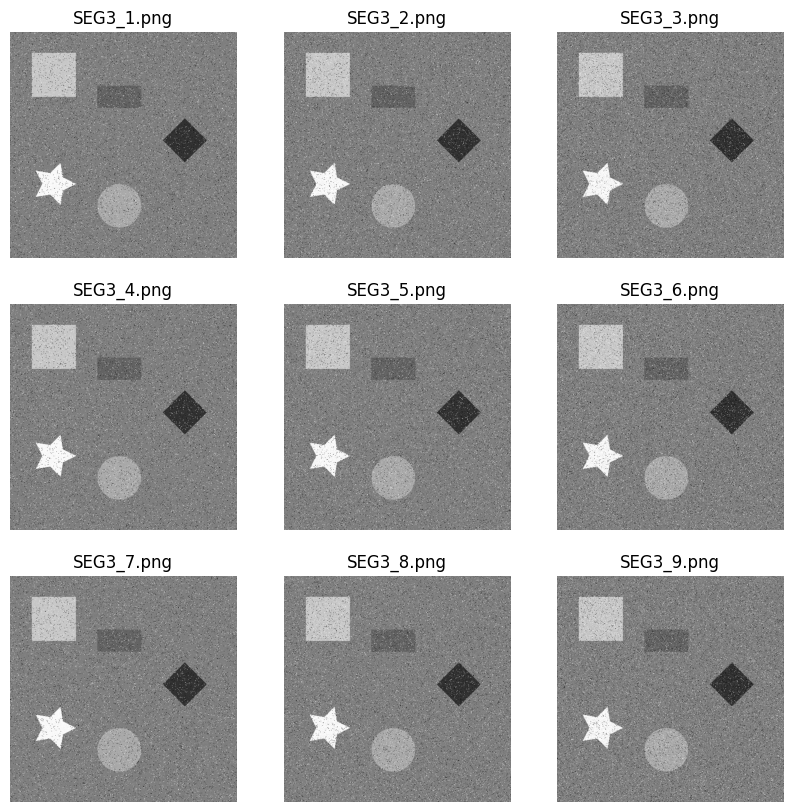

In [ ]:
import cv2
import numpy as np
import random

%cd /content/drive/MyDrive/Medical Imaging Final/Output
# Define image dimensions and background gray level
width, height = 520, 520
bg_gray_level = 128

# Define objects
objects = [
    ("square", 100, 100, 100, 200),
    ("rectangle", 100, 250, 150, 100),
    ("diamond", 100, 400, 250, 50),
    ("star", 100, 100, 350, 250),
    ("circle", 100, 250, 400, 170)
]

# Create original image SEG1
img = np.full((height, width), bg_gray_level, dtype=np.uint8)
for obj in objects:
    shape, size, x, y, gray_level = obj
    draw_func, *draw_args = create_object(shape, size, x, y, gray_level)
    draw_func(img, *draw_args)

def show_img_with_matplotlib(color_img, title, pos):
    """Shows an image using matplotlib capabilities"""

    # Convert BGR image to RGB
    img_RGB = color_img[:, :, ::-1]

    ax = plt.subplot(3, 3, pos)
    plt.imshow(img_RGB)
    plt.title(title)
    plt.axis('off')
    # plt.axis('off')

# Define levels of Gaussian noise and impulse noise
gaussian_noise_levels = [15, 20, 25]
impulse_noise_levels = [0.05, 0.1, 0.08]

_, axis = plt.subplots(2, 5, figsize = (10,10))

# Create three levels of Gaussian noise and three levels of impulse noise for each image
for i in range(1, 10):
    # Add Gaussian noise
    gaussian_noise = np.random.normal(scale=gaussian_noise_levels[(i-1) % 3], size=(height, width))
    img_gaussian_noise = np.clip(img.astype(np.float32) + gaussian_noise, 0, 255).astype(np.uint8)
    # cv2.imwrite(f"SEG2_{i}.png", img_gaussian_noise)

    # Add impulse noise
    img_impulse_noise = add_salt_pepper_noise(img_gaussian_noise, 0.05)
    cv2.imwrite(f"SEG3_{i}.png", img_impulse_noise)
    show_img_with_matplotlib(cv2.cvtColor(img_impulse_noise, cv2.COLOR_GRAY2BGR), f'SEG3_{i}.png' , i)
    # plt.imshow(img_impulse_noise, 'gray')
    # plt.show()

    
# Save original image SEG1
cv2.imwrite("SEG1.png", img)


# Relative signed area error

In [23]:
def relative_area_error(gt, out):
     # Get the areas of all the objects in output   
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(out)
    areas = stats[:, cv2.CC_STAT_AREA]
    # Sort the areas in descending order and get the indices
    sorted_indices = np.argsort(areas)[::-1]
    # Get the areas and centroids of the top 5 objects
    area = 0
    num_objects = min(5, num_labels - 1)  # Ensure we don't go out of bounds
    for i in range(num_objects):
        index = sorted_indices[i + 1]  # Skip the background label (0)
        area += areas[index]


    # Get the areas of all the objects in gt   
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(gt)
    areas = stats[:, cv2.CC_STAT_AREA]
    # Sort the areas in descending order and get the indices
    sorted_indices = np.argsort(areas)[::-1]
    # Get the areas and centroids of the top 5 objects
    area_gt = 0
    num_objects = min(5, num_labels - 1)  # Ensure we don't go out of bounds
    for i in range(num_objects):
        index = sorted_indices[i + 1]  # Skip the background label (0)
        area_gt += areas[index]
    
    # print(area_gt, area)
    error = (area_gt - area) * 100 /area_gt
    return error

# Labelling Error

In [40]:
def labeling_error(gt, out):
    # gt = threshold_image(gt)
    # out = threshold_image(out)

    count = 0
    count_GT = 0 
    H, W = out.shape[:2]
    for i in range (H):
      for j in range (W):
        if (gt[i][j] == 255 and out[i][j] != 255) or (gt[i][j] == 0 and out[i][j] != 0):
          count += 1
        if gt[i][j] == 255:
          count_GT += 1
    return (count / count_GT)*100

# Basic Thresholdings

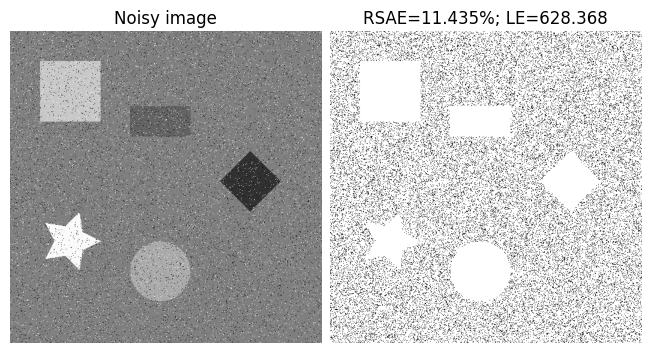

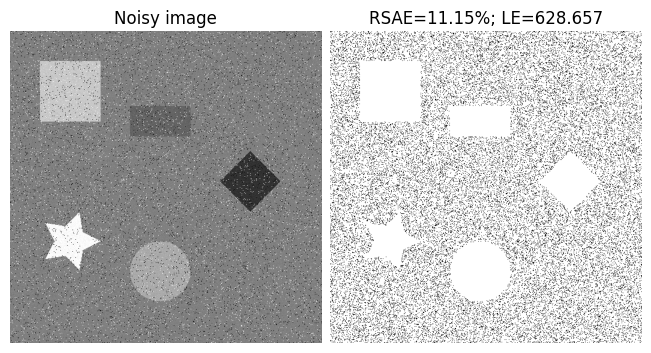

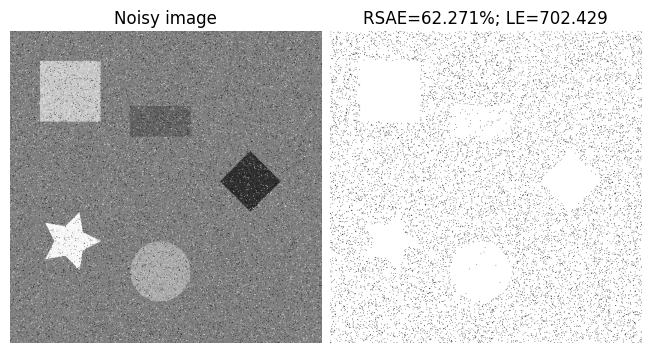

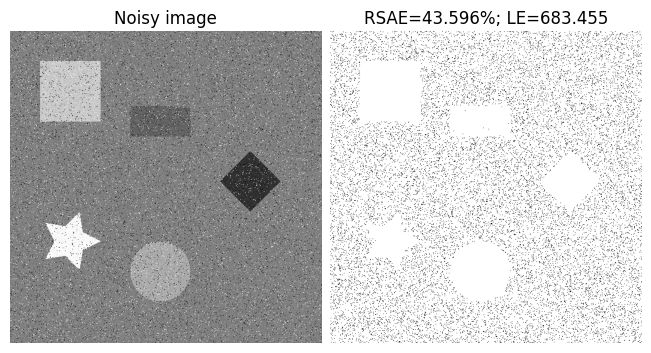

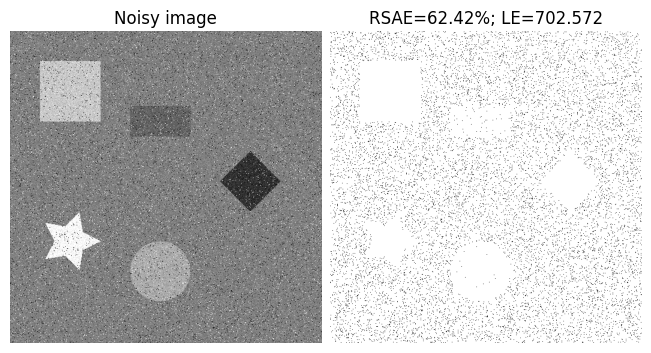

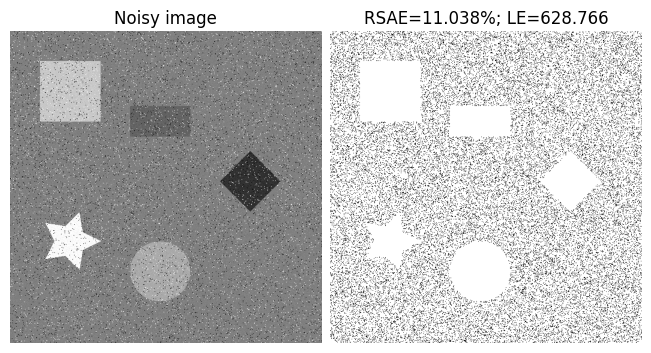

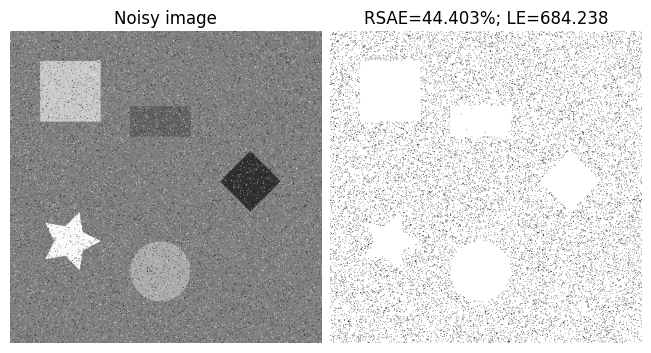

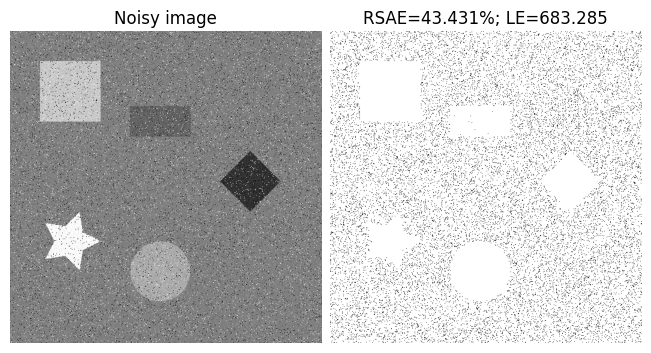

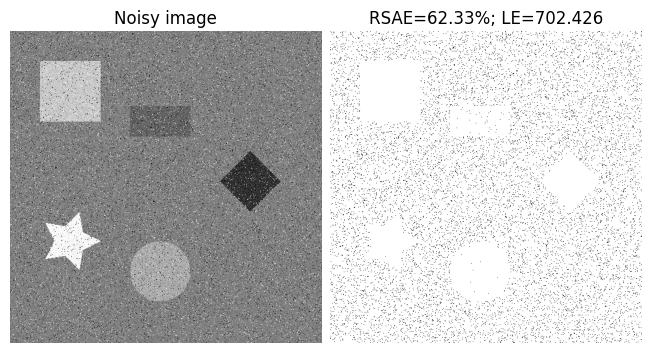

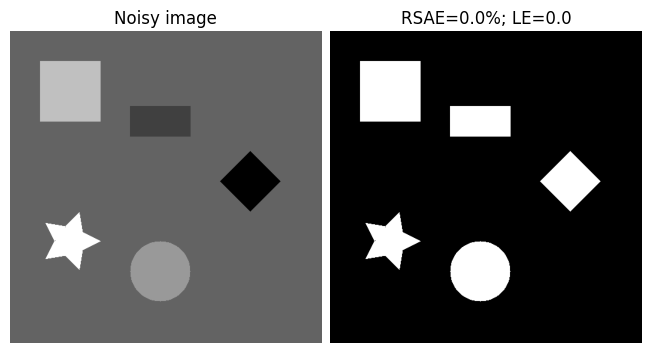

In [69]:
def threshold_image(img):
    thresh_below = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)[1]
    thresh_above = cv2.threshold(img, 126, 255, cv2.THRESH_BINARY_INV)[1]
    threshold = cv2.add(thresh_below, thresh_above)
    return threshold

GT = cv2.imread('/content/drive/MyDrive/Medical Imaging Final/Output/SEG1.png', 0)
GT = threshold_image(GT)


path = '/content/drive/MyDrive/Medical Imaging Final/Output'
i = 0
for files in os.listdir(path):
  if files.startswith('SEG'):
    img = cv2.imread(os.path.join(path, files), 0)
    _, axs = plt.subplots(1, 2, layout='constrained')
    axs[0].imshow(img, 'gray')
    axs[0].set_title('Noisy image')
    axs[0].axis('off')
    out = threshold_image(img)

    error = relative_area_error(GT, out)
    label = labeling_error(GT, out)

    axs[1].imshow(out, 'gray')
    axs[1].set_title(f'RSAE={round(error,3)}%; LE={round(label,3)}')
    axs[1].axis('off')
    plt.show()
    

# Chan-Vase algorithm

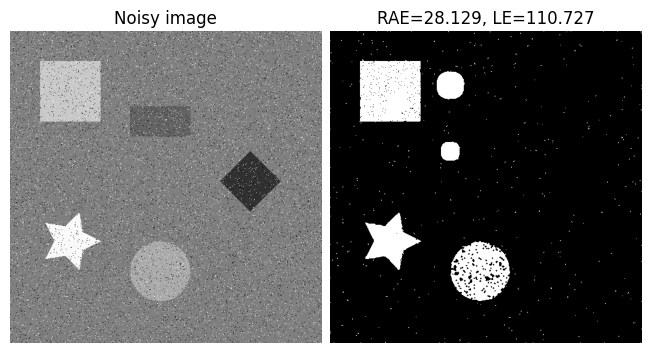

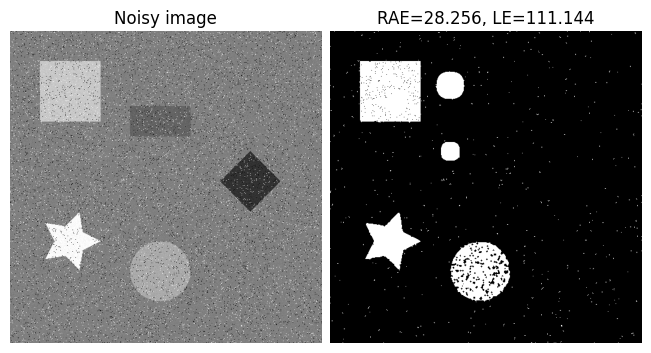

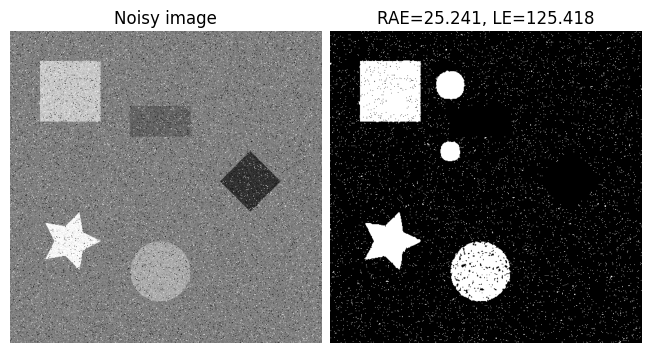

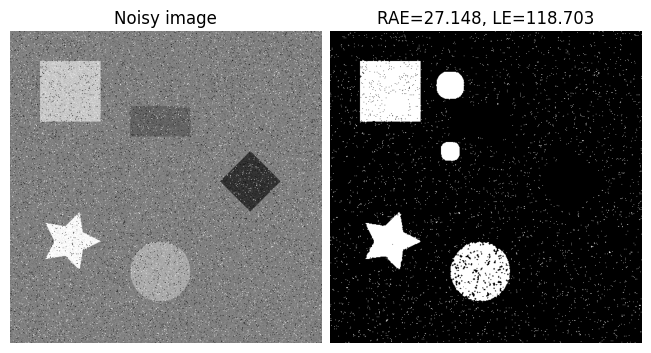

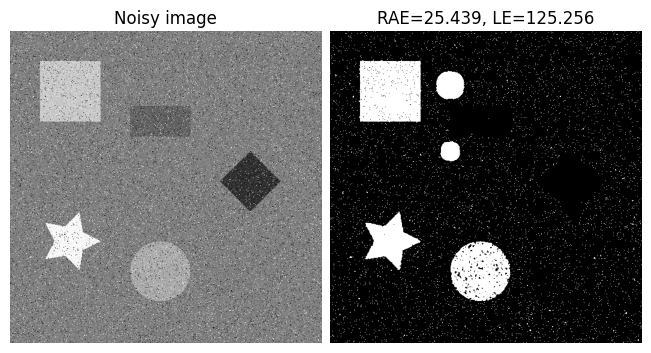

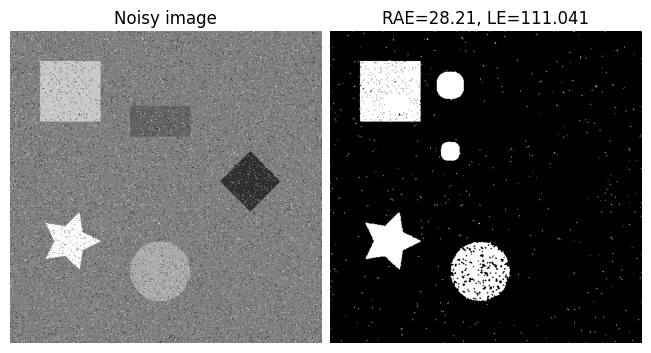

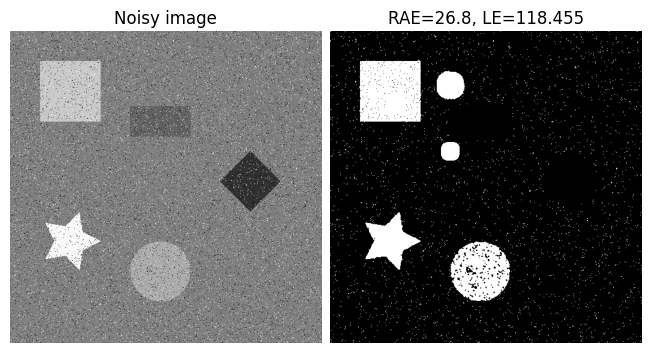

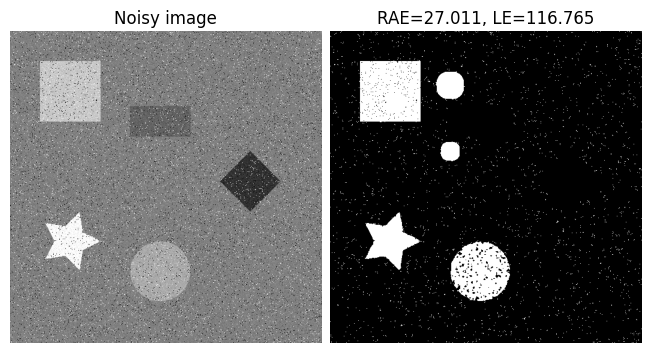

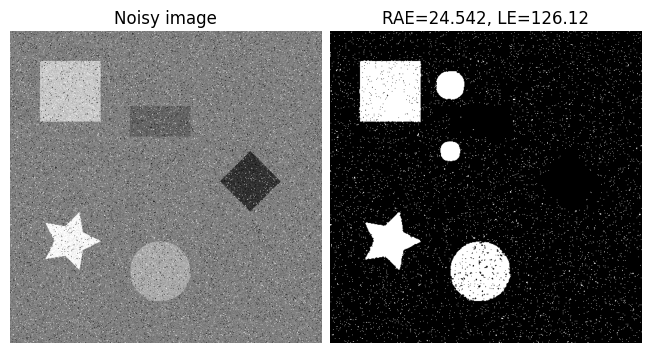

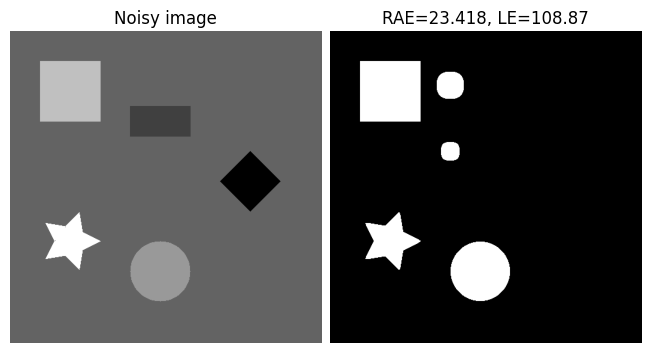

In [67]:
from skimage.segmentation import chan_vese
import skimage

def chanVeseSegmentation(origImage, lambda1=1, lambda2=1):
  grayscale_orig = origImage
  contour = np.zeros_like(grayscale_orig)
  rr1, cc1 = skimage.draw.disk((90,200),20)
  rr2, cc2 = skimage.draw.disk((120,110),13)
  rr3, cc3 = skimage.draw.disk((200,200), 13)
  contour[rr1, cc1] = 1
  contour[rr2, cc2] = 1
  contour[rr3, cc3] = 1
  cv = chan_vese(grayscale_orig, mu=1, lambda1=lambda1, lambda2=lambda2, tol=1e-3,
               max_num_iter=1000, dt=0.5, init_level_set=contour,
               extended_output=True)
  return cv[0]


GT = cv2.imread('/content/drive/MyDrive/Medical Imaging Final/Output/SEG1.png', 0)
GT = threshold_image(GT)

# test = chanVeseSegmentation(GT)
# plt.imshow(test, 'gray')

path = '/content/drive/MyDrive/Medical Imaging Final/Output'

for files in os.listdir(path):
  if files.startswith('SEG'):
      _, axs = plt.subplots(1, 2, layout='constrained')

      test = cv2.imread(os.path.join(path, files), 0)

      axs[0].imshow(test, 'gray')
      axs[0].set_title('Noisy image')
      axs[0].axis('off')

      test = chanVeseSegmentation(test).astype(np.uint8)

      # print(test.dtype)
      error = relative_area_error(GT, test)
      label = labeling_error(GT,  test)


      

      axs[1].imshow(test, 'gray')
      axs[1].set_title(f'RAE={round(error,3)}, LE={round(label,3)}')
      axs[1].axis('off')
      plt.show()

# show_img_with_matplotlib(cv2.cvtColor(seg_thres, cv2.COLOR_GRAY2BGR), 'RAE='+str(error)[:5]+' LE='+str(label)[:5], i)
    

# Image Registration

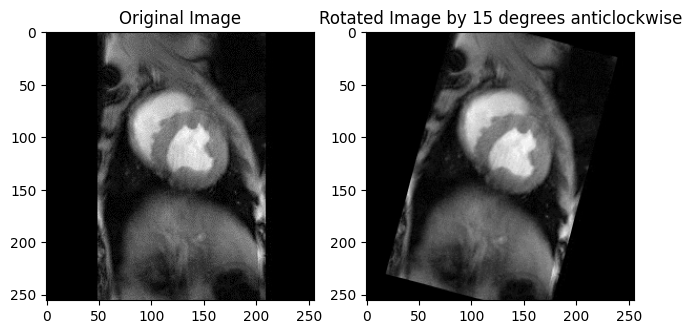

True

In [71]:
import math

img = cv2.imread('/content/drive/MyDrive/Medical Imaging Final/heart.jpg', 0)
h, w = img.shape
_, axs = plt.subplots(1, 2, layout='constrained')

axs[0].imshow(img, cmap='gray')
axs[0].set_title('Original Image')
# plt.show()

angle = -15.0
rotation_matrix = cv2.getRotationMatrix2D((h/2, w/2), angle, 1)

rotated_img = cv2.warpAffine(img, rotation_matrix, (w, h))
axs[1].imshow(rotated_img, cmap='gray')
axs[1].set_title('Rotated Image by 15 degrees anticlockwise')
plt.show()

cv2.imwrite('heart.15.jpg', rotated_img)

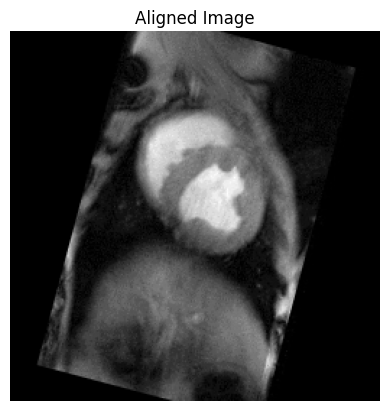

In [72]:
# Load the images
img1 = cv2.imread('/content/drive/MyDrive/Medical Imaging Final/heart.jpg', 0)
img2 = cv2.imread('/content/drive/MyDrive/Medical Imaging Final/Output/heart.15.jpg', 0)

# Create a SIFT detector object
sift = cv2.SIFT_create()

# Find keypoints and descriptors in the images
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

# Create a Brute-Force Matcher object
bf = cv2.BFMatcher()

# Match keypoints in the two images
matches = bf.knnMatch(des1, des2, k=2)

# Apply ratio test to filter out poor matches
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

# Get the coordinates of the matched keypoints in each image
src_pts = np.float32([kp1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
dst_pts = np.float32([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

# Find the transformation matrix using RANSAC algorithm
M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

# Warp the source image using the transformation matrix
aligned_img = cv2.warpPerspective(img1, M, (img1.shape[1], img1.shape[0]))

# Show the aligned image
plt.imshow(aligned_img, 'gray')
plt.title('Aligned Image')
plt.axis('off')
plt.show()

# Linear Heat Equation

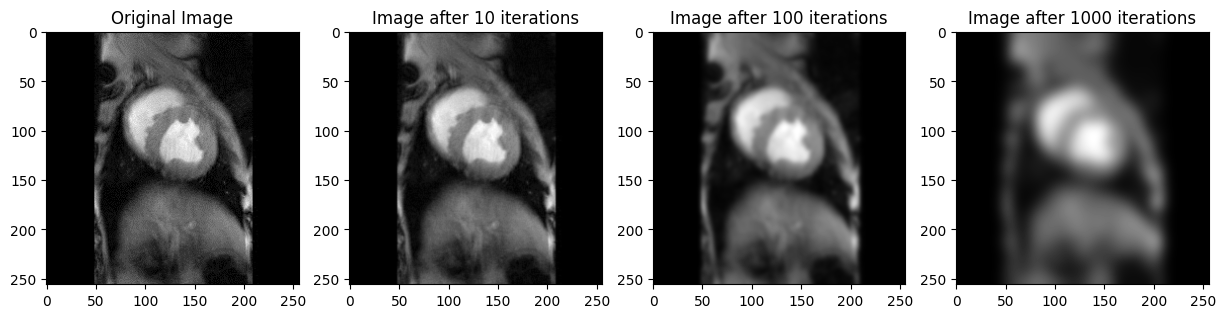

In [73]:
# Load the image
img = cv2.imread('/content/drive/MyDrive/Medical Imaging Final/heart.jpg', 0).astype(np.float64)

# diffusion coefficient
D = 0.1

# time step
dt = 0.1

show_iters = [10,100,1000]

x_second_derivative = np.array([[1,-2,1]])
y_second_derivative = x_second_derivative.T

fig, axs = plt.subplots(1,4, figsize=(15, 6))
axs[0].imshow(img, cmap='gray')
axs[0].set_title('Original Image')
subplot = 1

# Apply the heat equation for 1001 iterations
for n in range(1001):

    ## Second derivative of image in the x-direction
    img_xx = cv2.filter2D(src=img, ddepth=-1, kernel=x_second_derivative)

    ## Second derivative of image in the y-direction
    img_yy = cv2.filter2D(src=img, ddepth=-1, kernel=y_second_derivative)

    # Apply the discretized heat equation
    img += D * dt * (img_xx*2 + img_yy*2)
    if n in show_iters:
      axs[subplot].imshow(img, cmap='gray')
      axs[subplot].set_title('Image after ' + str(n) + ' iterations')
      subplot += 1